Height: 4, Aspect: 2


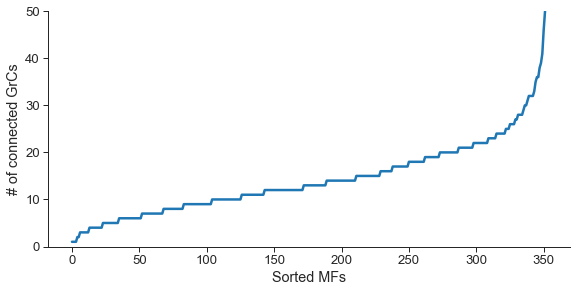

In [1]:
import collections
from collections import defaultdict
import sys
import json
import random
from jsmin import jsmin
from io import StringIO
import numpy as np
import copy
import importlib
from functools import partial
import math
import os
import compress_pickle

# script_n = os.path.basename(__file__).split('.')[0]
script_n = 'mf_bouton_210519_compare_dist'

sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData

import tools_mf_graph
importlib.reload(tools_mf_graph)

# fname = ('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/'\
#                                    'mf_grc_model/input_graph_210407_all.gz')
fname = ('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/' \
         'gen_db/mf_grc/input_graph_210520_all_100_2.gz')
input_graph = compress_pickle.load(fname)

z_min = 19800-10000
z_max = 29800+10000
# GrCs are fully reconstructed and proofread from 90k to 150k
x_min = 320*1000
x_max = 560*1000

pair_reps = defaultdict(int)

mfs_within_box = set()
mf_locs_within_box = set()
loc_to_mf = dict()

for mf_id, mf in input_graph.mfs.items():
    rosette_loc_size = {}
    mf.get_all_mf_locs_size(rosette_loc_size)
    for rosette_loc, size in rosette_loc_size.items():
        x, y, z = rosette_loc
        if x < x_min or x > x_max:
            continue
        if z < z_min or z > z_max:
            continue
        mfs_within_box.add(mf_id)
        mf_locs_within_box.add(rosette_loc)
        loc_to_mf[rosette_loc] = mf_id

# input_graph.randomize(preserve_mf_degree='soft')
# input_graph.randomize(preserve_mf_degree=False)

connected_grcs = set()
mf_connections = defaultdict(set)
mf_size = defaultdict(int)
for grc_id in input_graph.grcs:
    grc = input_graph.grcs[grc_id]
    connected_edge_count = 0
    for edge in grc.edges:
        mf_id, mf_loc = edge
        if mf_loc not in mf_locs_within_box:
            continue
        mf_connections[mf_id].add(grc_id)
        mf_size[mf_loc] += 1
        connected_edge_count += 1
    connected_grcs.add((grc_id, connected_edge_count))
    
mf_size_sorted = []
for mf_id in mf_locs_within_box:
    mf_size_sorted.append((mf_id, mf_size[mf_id]))
mf_size_sorted.sort(key=lambda x: x[1])

mpd_count = MyPlotData()
i = 0
for mf_id in mf_size_sorted:
    mf_id, size = mf_id
    mpd_count.add_data_point(
#         count=len(mf_connections[mf_id]),
        count=size,
        mf_id=i,
    )
    i += 1

importlib.reload(my_plot); my_plot.my_relplot(
    mpd_count,
    x='mf_id',
    y='count',
#     kind='hist',
    context='paper',
    linewidth=2.5,
    ylim=[0, 50],
#     kde=True,
#     stat='density',
    height=4,
    aspect=2,
    y_axis_label='# of connected GrCs',
    x_axis_label='Sorted MFs',
    save_filename=f'{script_n}_line.svg',
    show=True,
    )

In [2]:
mf_size_sorted

[((537931, 383661, 21102), 1),
 ((557964, 386006, 37580), 1),
 ((479024, 421878, 33042), 1),
 ((374336, 405196, 34968), 1),
 ((337507, 459653, 19537), 2),
 ((419459, 399416, 16648), 2),
 ((380181, 458339, 34087), 3),
 ((333962, 461824, 11521), 3),
 ((333052, 441480, 15815), 3),
 ((324051, 452380, 32057), 3),
 ((470798, 419426, 20851), 3),
 ((384714, 440832, 16743), 3),
 ((346999, 416907, 28218), 3),
 ((520474, 397837, 12316), 4),
 ((380373, 484018, 27640), 4),
 ((552998, 389381, 11137), 4),
 ((454917, 416603, 13661), 4),
 ((499236, 453748, 10300), 4),
 ((458391, 448689, 35391), 4),
 ((500196, 428688, 14841), 4),
 ((452864, 449355, 28561), 4),
 ((449881, 449744, 39017), 4),
 ((542129, 391359, 18542), 4),
 ((370566, 478368, 34647), 5),
 ((390955, 481241, 25500), 5),
 ((365490, 468444, 13015), 5),
 ((334309, 421230, 39743), 5),
 ((438997, 445010, 35826), 5),
 ((402009, 427451, 20587), 5),
 ((334037, 427693, 24513), 5),
 ((459900, 431251, 17020), 5),
 ((539783, 433134, 26786), 5),
 ((55911

In [6]:
mf_size_map = {}
for mf, size in mf_size_sorted:
    mf_size_map[mf] = size

out_n = f'{script_n}_mf_size_map.gz'
print(out_n)
import compress_pickle
compress_pickle.dump(mf_size_map, out_n)

mf_bouton_210519_compare_dist_mf_size_map.gz


In [74]:
mf_size_sorted
total = 0
top10_n = int(len(mf_size_sorted)/3)
for n in mf_size_sorted:
    total += n[1]
print(total)
total_top = 0
for n in mf_size_sorted[-top10_n:]:
    total_top += n[1]
print(total_top)
total_bottom = 0
for n in mf_size_sorted[0:top10_n]:
    total_bottom += n[1]
print(total_bottom)
print(total_top/total_bottom)

973
502
151
3.3245033112582782


In [2]:
# importlib.reload(my_plot)
# importlib.reload(my_plot_data)

# mpd_hist_observed = MyPlotData()
# for k, v in mpd_count.get_histogram(count_var='count').items():
#     mpd_hist_observed.add(
#         num_grcs=k,
#         count=v,
#         model='Reconstructed')
# mpd_count_observed.add_key_value('model', 'Reconstructed')

# def my_to_histogram(self, count_var=None, count_name='count', new_count_var=None):
#         hist = self.get_histogram(count_var, count_name)
#         ret = MyPlotData()
#         if new_count_var is None:
#             new_count_var = count_var
#         for k, v in hist.items():
#             args = {
#                 f'{count_var}': k,
#                 f'{count_name}': v,
#             }
#             ret.add(**args)
#         return ret

# mpd_count.to_histogram = my_to_histogram

# mpd_hist_observed = MyPlotData()
# mpd_hist_observed = mpd_count.to_histogram('count', 'count', new_count_var='num_grcs')
# for k, v in mpd_count.get_histogram(count_var='count').items():
#     mpd_hist_observed.add(
#         num_grcs=k,
#         count=v,
#         model='Reconstructed')
# mpd_count_observed.add_key_value('model', 'Reconstructed')


import sys
import importlib
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData

import compress_pickle
import my_plot_data
mpd_random = compress_pickle.load(
    'mf_bouton_210519_random_circle_dist_X_420000_540000_Z_19800_29800.gz').add_key_value(
    'model', 'Random')
# mpd_random = mpd_random.to_histogram()
mpd_random.to_histogram('count', hist_key='num_grcs', hist_val='count')
mpd_random.add_cdf('count')
mpd_all.append(mpd_random)

NameError: name 'mpd_all' is not defined

Height: 3, Aspect: 1.3333333333333333


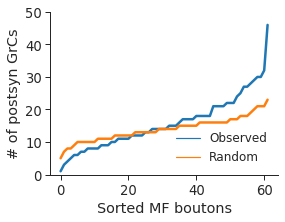

In [38]:
mpd_count_observed = copy.copy(mpd_count)
mpd_count_observed.add_key_value('model', 'Observed')

mpd_all = MyPlotData()
mpd_all.append(mpd_count_observed)

mpd_random = compress_pickle.load(
    'mf_bouton_210519_random_circle_dist_X_420000_540000_Z_19800_29800.gz').add_key_value(
    'model', 'Random')
mpd_all.append(mpd_random)

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='lower right', frameon=False, fontsize=12)

importlib.reload(my_plot); my_plot.my_relplot(
    mpd_all,
    x='mf_id',
    y='count',
    hue='model',
#     kind='hist',
    context='paper',
    linewidth=2.5,
    ylim=[0, 50],
#     kde=True,
#     stat='density',
    height=3,
    width=4,
#     aspect=2,
    y_axis_label='# of postsyn GrCs',
    x_axis_label='Sorted MF boutons',
    save_filename=f'{script_n}_observed_vs_random.svg',
    custom_legend_fn=custom_legend_fn,
    show=True,
    )


Height: 4, Aspect: 1.5


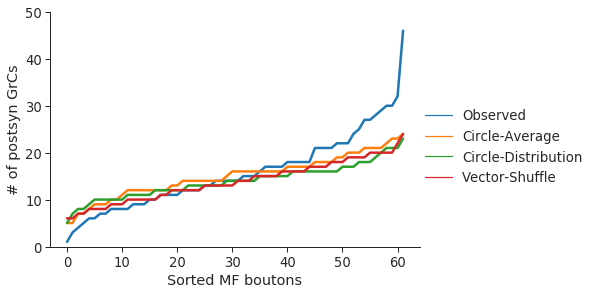

In [36]:
mpd_count_observed = copy.copy(mpd_count)
mpd_count_observed.add_key_value('model', 'Observed')

mpd_all = MyPlotData()
mpd_all.append(mpd_count_observed)

mpd_random = compress_pickle.load(
    'mf_bouton_210519_random_circle_X_420000_540000_Z_19800_29800.gz').add_key_value(
    'model', 'Circle-Average')
mpd_all.append(mpd_random)

mpd_random = compress_pickle.load(
    'mf_bouton_210519_random_circle_dist_X_420000_540000_Z_19800_29800.gz').add_key_value(
    'model', 'Circle-Distribution')
mpd_all.append(mpd_random)

mpd_random = compress_pickle.load(
#     'mf_bouton_210519_random_test_X_420000_540000_Z_19800_29800.gz').add_key_value(
#     'mf_bouton_210519_random_edge_X_420000_540000_Z_19800_29800.gz').add_key_value(
#     'mf_bouton_210519_random_edge_10000_X_420000_540000_Z_19800_29800.gz').add_key_value(
    'mf_bouton_210519_random_edge_global_15000_X_420000_540000_Z_19800_29800.gz').add_key_value(
#     'mf_bouton_210519_random_edge_global_10000_X_420000_540000_Z_19800_29800.gz').add_key_value(
#     'mf_bouton_210519_random_edge_global_20000_X_420000_540000_Z_19800_29800.gz').add_key_value(
    'model', 'Vector-Shuffle')
mpd_all.append(mpd_random)

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='lower right', frameon=False, fontsize=12)

importlib.reload(my_plot); my_plot.my_relplot(
    mpd_all,
    x='mf_id',
    y='count',
    hue='model',
#     kind='hist',
    context='paper',
    linewidth=2.5,
    ylim=[0, 50],
#     kde=True,
#     stat='density',
    height=4,
    width=6,
#     aspect=2,
    y_axis_label='# of postsyn GrCs',
    x_axis_label='Sorted MF boutons',
    save_filename=f'{script_n}_observed_vs_random_supp.svg',
#     custom_legend_fn=custom_legend_fn,
    show=True,
    )


Height: 3, Aspect: 1.5


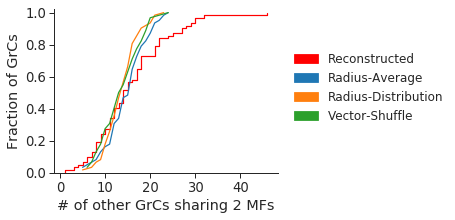

In [67]:

mpd_all = MyPlotData()

mpd_random = compress_pickle.load('mf_bouton_210519_random_circle_X_420000_540000_Z_19800_29800.gz')
mpd_random = mpd_random.to_histogram('count', hist_key='num_grcs', hist_val='count')
mpd_random.add_key_value('model', 'Radius-Average')
mpd_random.add_cdf('count')
mpd_all.append(mpd_random)

mpd_random = compress_pickle.load(
    'mf_bouton_210519_random_circle_dist_X_420000_540000_Z_19800_29800.gz')
mpd_random = mpd_random.to_histogram('count', hist_key='num_grcs', hist_val='count')
mpd_random.add_key_value('model', 'Radius-Distribution')
mpd_random.add_cdf('count')
mpd_all.append(mpd_random)

mpd_random = compress_pickle.load(
    'mf_bouton_210519_random_edge_global_15000_X_420000_540000_Z_19800_29800.gz')
mpd_random = mpd_random.to_histogram('count', hist_key='num_grcs', hist_val='count')
mpd_random.add_key_value('model', 'Vector-Shuffle')
mpd_random.add_cdf('count')
mpd_all.append(mpd_random)

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='lower right', frameon=False, fontsize=12)

    
mpd_count_observed = copy.copy(mpd_count)
mpd_count_observed.add_key_value('model', 'Reconstructed')
import matplotlib.pyplot as plt
plt.subplots(figsize=(4, 3))
import seaborn as sns
ax = sns.ecdfplot(data=mpd_count_observed.to_dataframe(), x="count", palette=palette, hue='model')
    
importlib.reload(my_plot); my_plot.my_lineplot(
    mpd_all,
    x='num_grcs',
    y='count_cdf',
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=1.25,
    ylim=[0, 1.02],
    height=3,
    width=4.5,
#     aspect=2,
    y_axis_label='Fraction of GrCs',
    x_axis_label='# of other GrCs sharing 2 MFs',
    save_filename=f'{script_n}_observed_vs_random_supp_cdf.svg',
    no_show=True,
    )

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Reconstructed')
patch0 = mpatches.Patch(color=sns.color_palette()[0], label='Radius-Average')
patch1 = mpatches.Patch(color=sns.color_palette()[1], label='Radius-Distribution')
patch2 = mpatches.Patch(color=sns.color_palette()[2], label='Vector-Shuffle')
# plt.legend(handles=[red_patch, black_patch])
plt.legend(frameon=False, fontsize=12, handles=[red_patch, patch0, patch1, patch2],
          bbox_to_anchor=(1.025, .8),)
# plt.legend(labels=['legendEntry1', 'legendEntry2'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(f'{script_n}_supp_cdf.svg', bbox_inches='tight', transparent=True)
plt.show()
plt.close()


Height: 4, Aspect: 1.0


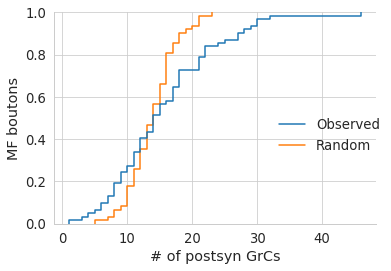

In [101]:
mpd_count_observed = copy.copy(mpd_count)
mpd_count_observed.add_key_value('model', 'Observed')

mpd_all = MyPlotData()
mpd_all.append(mpd_count_observed)

mpd_random = compress_pickle.load(
    'mf_bouton_210519_random_circle_dist_X_420000_540000_Z_19800_29800.gz').add_key_value(
    'model', 'Random')
mpd_all.append(mpd_random)

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='lower right', frameon=False, fontsize=12)

importlib.reload(my_plot); my_plot.my_displot(
    mpd_all,
    x='count',
    hue='model',
#     kind='kde',
    kind='ecdf',
    context='paper',
#     linewidth=2.5,
#     ylim=[0, 50],
    height=4,
    width=4,
#     aspect=2,
    y_axis_label='MF boutons',
    x_axis_label='# of postsyn GrCs',
    save_filename=f'{script_n}_observed_vs_random_ecdf.svg',
#     custom_legend_fn=custom_legend_fn,
    show=True,
    )


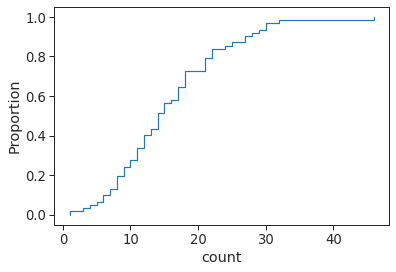

In [33]:
mpd_count_observed = copy.copy(mpd_count)
mpd_count_observed.add_key_value('model', 'Observed')

import seaborn as sns
sns.ecdfplot(data=mpd_count_observed.to_dataframe(), x="count")


Height: 4, Aspect: 1.0


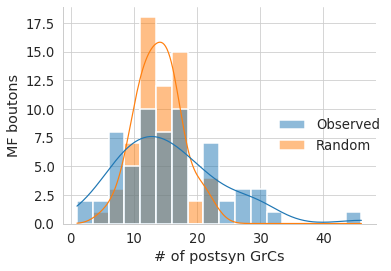

In [51]:

importlib.reload(my_plot); my_plot.my_displot(
    mpd_all,
    x='count',
    hue='model',
    kde=True,
#     kind='kde',
#     kind='ecdf',
    context='paper',
#     linewidth=2.5,
#     ylim=[0, 50],
    height=4,
    width=4,
#     aspect=2,
    y_axis_label='MF boutons',
    x_axis_label='# of postsyn GrCs',
    save_filename=f'{script_n}_observed_vs_random_pdf.svg',
#     custom_legend_fn=custom_legend_fn,
    show=True,
    )


In [16]:
mpd_random.data

[{'num_grcs': 11,
  'count': 6,
  'model': 'Random',
  'count_cdf': 0.0967741935483871},
 {'num_grcs': 16,
  'count': 3,
  'model': 'Random',
  'count_cdf': 0.14516129032258066},
 {'num_grcs': 12,
  'count': 7,
  'model': 'Random',
  'count_cdf': 0.25806451612903225},
 {'num_grcs': 8,
  'count': 2,
  'model': 'Random',
  'count_cdf': 0.2903225806451613},
 {'num_grcs': 9,
  'count': 3,
  'model': 'Random',
  'count_cdf': 0.3387096774193548},
 {'num_grcs': 19,
  'count': 6,
  'model': 'Random',
  'count_cdf': 0.43548387096774194},
 {'num_grcs': 22,
  'count': 3,
  'model': 'Random',
  'count_cdf': 0.4838709677419355},
 {'num_grcs': 14,
  'count': 10,
  'model': 'Random',
  'count_cdf': 0.6451612903225806},
 {'num_grcs': 15,
  'count': 1,
  'model': 'Random',
  'count_cdf': 0.6612903225806451},
 {'num_grcs': 17,
  'count': 7,
  'model': 'Random',
  'count_cdf': 0.7741935483870968},
 {'num_grcs': 13,
  'count': 6,
  'model': 'Random',
  'count_cdf': 0.8709677419354839},
 {'num_grcs': 24,
 

Height: 3, Aspect: 1.5


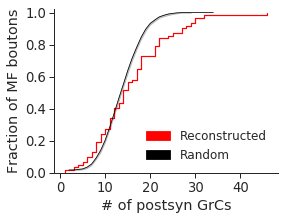

In [66]:
# mpd_count_observed = mpd_count.to_histogram('count', hist_key='num_grcs', hist_val='count')
# mpd_count_observed.add_key_value('model', 'Reconstructed')
# mpd_count_observed.add_cdf('count')
mpd_all = MyPlotData()
# mpd_all.append(mpd_count_observed)



db = compress_pickle.load('mf_bouton_210519_random_gen_circle_100.gz')
for trial in db:
    hist = defaultdict(int)
    for v in trial:
        hist[v] += 1
    mpd_random = MyPlotData()
    for k, v in sorted(hist.items()):
        mpd_random.add(
            num_grcs=k,
            count=v,
            model='Random'
        )
    mpd_random.add_cdf('count')
    mpd_all.append(mpd_random)
        

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='lower right', frameon=False, fontsize=12)

palette = {
    'Reconstructed': 'red',
    'Random': 'black',
}

mpd_count_observed = copy.copy(mpd_count)
mpd_count_observed.add_key_value('model', 'Reconstructed')
import matplotlib.pyplot as plt
plt.subplots(figsize=(4, 3))
import seaborn as sns
ax = sns.ecdfplot(data=mpd_count_observed.to_dataframe(), x="count", palette=palette, hue='model')

importlib.reload(my_plot); my_plot.my_lineplot(
    mpd_all,
    ax=ax,
    x='num_grcs',
    y='count_cdf',
    hue='model',
#     kind='kde',
#     kind='line',
    context='paper',
    palette=palette,
    linewidth=.75,
    ylim=[0, 1.02],
    height=3,
    width=4.5,
    ci=99,
#     aspect=2,
    y_axis_label='Fraction of MF boutons',
    x_axis_label='# of postsyn GrCs',
    save_filename=f'{script_n}_observed_vs_random_cdf.svg',
#     custom_legend_fn=custom_legend_fn,
#     show=True,
    no_show=True,
    )

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Reconstructed')
black_patch = mpatches.Patch(color='black', label='Random')
# plt.legend(handles=[red_patch, black_patch])
plt.legend(loc='top right', frameon=False, fontsize=12, handles=[red_patch, black_patch])
# plt.legend(labels=['legendEntry1', 'legendEntry2'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(f'{script_n}_observed_vs_random_cdf.svg', bbox_inches='tight', transparent=True)
plt.show()
plt.close()



In [106]:
mpd_count_observed.data

[{'count': 1,
  'mf_id': 0,
  'model': 'Observed',
  'count_pdf': 0.0010277492291880781,
  'count_cdf': 0.0010277492291880781},
 {'count': 3,
  'mf_id': 1,
  'model': 'Observed',
  'count_pdf': 0.003083247687564234,
  'count_cdf': 0.0041109969167523125},
 {'count': 4,
  'mf_id': 2,
  'model': 'Observed',
  'count_pdf': 0.0041109969167523125,
  'count_cdf': 0.008221993833504625},
 {'count': 5,
  'mf_id': 3,
  'model': 'Observed',
  'count_pdf': 0.0051387461459403904,
  'count_cdf': 0.013360739979445015},
 {'count': 6,
  'mf_id': 4,
  'model': 'Observed',
  'count_pdf': 0.006166495375128468,
  'count_cdf': 0.019527235354573486},
 {'count': 6,
  'mf_id': 5,
  'model': 'Observed',
  'count_pdf': 0.006166495375128468,
  'count_cdf': 0.025693730729701953},
 {'count': 7,
  'mf_id': 6,
  'model': 'Observed',
  'count_pdf': 0.007194244604316547,
  'count_cdf': 0.0328879753340185},
 {'count': 7,
  'mf_id': 7,
  'model': 'Observed',
  'count_pdf': 0.007194244604316547,
  'count_cdf': 0.0400822199

In [77]:
from scipy.stats import kurtosis
observed = []
for i in mpd_count.data:
    observed.append(i['count'])
print(f'Observed: {kurtosis(observed)}')
random_vals = []
for i in mpd_random.data:
    random_vals.append(i['count'])
print(f'Random: {kurtosis(random_vals)}')

Observed: 1.4948985153764847
Random: -0.013844836207371536


In [78]:
import scipy.stats
scipy.stats.ranksums(observed, random_vals)

RanksumsResult(statistic=0.7246226905807425, pvalue=0.468683534735831)

In [79]:
from mlxtend.evaluate import permutation_test
p_value = permutation_test(observed, random_vals,
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
print(p_value)

0.13138686131386862


In [80]:
db = compress_pickle.load('mf_bouton_210519_random_gen_circle.gz')
more_random_vals = [j for i in db for j in i]
from mlxtend.evaluate import permutation_test
p_value = permutation_test(observed, more_random_vals,
                           method='approximate',
                           num_rounds=100,
                           seed=0)
print(p_value)


0.019801980198019802


In [97]:
db = compress_pickle.load('mf_bouton_210519_random_gen_circle_100.gz')
more_random_vals = [j for i in db for j in i]
from mlxtend.evaluate import permutation_test
p_value = permutation_test(observed, more_random_vals,
                           method='approximate',
                           num_rounds=100,
                           seed=0)
print(p_value)


0.009900990099009901


In [82]:
import scipy.stats
scipy.stats.ranksums(observed, more_random_vals)

RanksumsResult(statistic=0.8326502640994887, pvalue=0.40504200218849773)

In [68]:
# kurtosis test
from scipy.stats import kurtosis
db = compress_pickle.load('mf_bouton_210519_random_gen_circle.gz')

observed = []
for i in mpd_count.data:
    observed.append(i['count'])
observed_k = [kurtosis(observed)]

random_k = []
for trial in db:
    random_k.append(kurtosis(trial))

In [71]:
import scipy.stats
print(scipy.stats.ranksums(observed_k, random_k))
from mlxtend.evaluate import permutation_test
p_value = permutation_test(observed_k, random_k,
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
print(p_value)

RanksumsResult(statistic=1.630478929168218, pvalue=0.10300031496560585)
0.03899610038996101


In [77]:
# kurtosis test
from scipy.stats import kurtosis
db = compress_pickle.load('mf_bouton_210519_random_gen_circle_1000.gz')

observed = []
for i in mpd_count.data:
    observed.append(i['count'])
observed_k = [kurtosis(observed)]

random_k = []
for trial in db:
    random_k.append(kurtosis(trial))

# random_k *= 10

import scipy.stats
print(scipy.stats.ranksums(observed_k, random_k))
from mlxtend.evaluate import permutation_test
p_value = permutation_test(observed_k, random_k,
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
print(p_value)

RanksumsResult(statistic=1.6784117099995082, pvalue=0.09326675316520168)
0.014598540145985401


In [100]:
# kurtosis test
from scipy.stats import kurtosis
db = compress_pickle.load('mf_bouton_210519_random_gen_circle_1000.gz')

observed = []
for i in mpd_count.data:
    observed.append(i['count'])
observed_k = [scipy.stats.variation(observed)]

random_k = []
for trial in db:
    random_k.append(scipy.stats.variation(trial))

random_k *= 10
    
import scipy.stats
print(scipy.stats.ranksums(observed_k, random_k))
from mlxtend.evaluate import permutation_test
p_value = permutation_test(observed_k, random_k,
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
print(p_value)

RanksumsResult(statistic=1.731877628464553, pvalue=0.0832953527292029)
9.999000099990002e-05
